In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [4]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

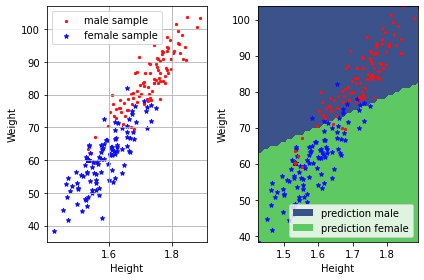

In [5]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # w = least squares with respect to tx and y
    w, loss = least_squares(y, tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute negative log likelihood loss.

In [9]:
def sigmoid_a(t):
    """apply the sigmoid function on t."""
    e = np.exp(t)
    return e/(1+e)

In [7]:
def sigmoid(t):
    """apply the sigmoid function on t."""
    sigmoid = 1 / (1 + np.exp(-t))
    return sigmoid

In [11]:
sigmoid_a(-100)

3.720075976020836e-44

In [12]:
sigmoid(-100)

3.7200759760208356e-44

In [133]:
y.shape

(200, 1)

In [134]:
x.shape

(200, 2)

In [135]:
x.dot(np.array([0,0])).shape

(200,)

In [378]:
def calculate_loss(y, tx, w, lambda_ = 0):
    """compute the loss: negative log likelihood."""
    t1 = -y*(tx.dot(w).reshape(tx.shape[0],1))
    t2 = np.log(1 + np.exp(tx.dot(w)))
    #t3 = lambda_ * np.sum(w**2)
    return np.sum(t1 + t2 )#+ t3)

In [351]:
calculate_loss(y, x, np.array([[-40],[6]]))

631.3949082610081

In [352]:
def calculate_gradient(y, tx, w, lambda_ = 0):
    """compute the gradient of loss."""
    D = tx.shape[1]
    
    t1 = np.subtract(sigmoid(tx.dot(w)).reshape(tx.shape[0],1), y)
    t2 = 2*lambda_*w
    return tx.T.dot(t1) + t2

In [353]:
calculate_gradient(y, x, np.array([[-40],[6]]))

array([[-15.04682725],
       [  3.94964369]])

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [338]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    
    w = w - gamma*gradient
    
    return loss, w

Demo!

Current iteration=0, loss=138.62943611198904
Current iteration=100, loss=43.46403230562902
Current iteration=200, loss=41.54589280875939
Current iteration=300, loss=41.098638973663114
Current iteration=400, loss=40.964870635605585
Current iteration=500, loss=40.920089458713036
Current iteration=600, loss=40.90418744318991
Current iteration=700, loss=40.89834994668996
Current iteration=800, loss=40.89616496609549
Current iteration=900, loss=40.8953375338211
Current iteration=1000, loss=40.895021964119
Current iteration=1100, loss=40.894901086855555
Current iteration=1200, loss=40.89485466141426
Current iteration=1300, loss=40.89483680124478
Current iteration=1400, loss=40.89482992328358
Current iteration=1500, loss=40.8948272728955
loss=40.89482664256953


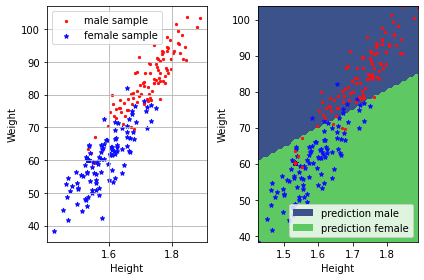

In [339]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your Hessian below

In [340]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function."""
    s1 = sigmoid(tx.dot(w))
    S = np.diag((s1 * (1-s1)).reshape(s1.shape[0],))

    return tx.T.dot(S).dot(tx)

In [341]:
calculate_hessian(y, x, np.array([[-40],[6]]))

array([[0.01204158, 0.06478087],
       [0.06478087, 0.49880235]])

Write a function below to return loss, gradient, and Hessian.

In [342]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and Hessian."""

    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    
    return loss, gradient, hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [368]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, gradient, hessian = logistic_regression(y, tx, w)

    w = w - gamma * np.linalg.inv(hessian).dot(gradient)
    
    return loss, w

demo

Current iteration=0, the loss=138.62943611198904
Current iteration=1, the loss=63.41155373909589
Current iteration=2, the loss=47.304586199350595
Current iteration=3, the loss=41.99746742248448
Current iteration=4, the loss=40.95639863723794
Current iteration=5, the loss=40.89511993648958
Current iteration=6, the loss=40.89482561762708
Current iteration=7, the loss=40.89482560989059
loss=40.89482560989058


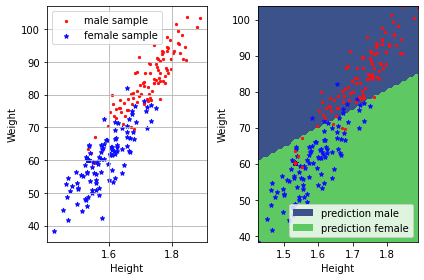

In [369]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))
    
    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression (first-order, no Newton)
Fill in the function below.

In [379]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, Hessian"""
    
    loss = calculate_loss(y, tx, w, lambda_)
    gradient = calculate_gradient(y, tx, w, lambda_)
    
    return loss, gradient

In [380]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    #print(np.linalg.norm(gradient))
    w = w - gamma*gradient
    
    return loss, w

Current iteration=0, loss=138.62943611198904
Current iteration=100, loss=45.68307503737025
Current iteration=200, loss=44.48180888336481
Current iteration=300, loss=44.28843774991212
Current iteration=400, loss=44.25324739936643
Current iteration=500, loss=44.24669651067861
Current iteration=600, loss=44.2454718521749
Current iteration=700, loss=44.24524272657508
Current iteration=800, loss=44.24519985232244
Current iteration=900, loss=44.24519182941931
loss=44.24519056356711


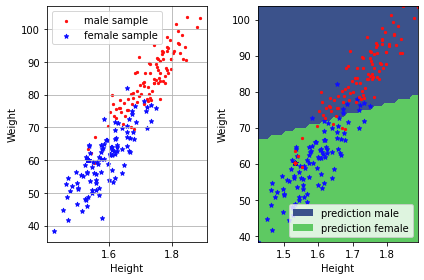

In [384]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.3
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w, lambda_)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)

In [14]:
a = {'k' : {1 : ['hi'], 2 : ['hello']}}

In [21]:
a['k'][1]

['hi']

In [39]:
b = {}

In [40]:
for k in range(4):
    b[k] = {}
    for x in range(5,8):
        b[k][x] = 'hello'

In [41]:
b

{0: {5: 'hello', 6: 'hello', 7: 'hello'},
 1: {5: 'hello', 6: 'hello', 7: 'hello'},
 2: {5: 'hello', 6: 'hello', 7: 'hello'},
 3: {5: 'hello', 6: 'hello', 7: 'hello'}}

In [44]:
1 in b

True

In [45]:
5 in b[0]

True